# Audio Classification with MAchince Learning

In [61]:
import pandas as pd
!pip install librosa

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline

import librosa
import librosa.display
import IPython.display as ipd

**Check one sample Audio (Dog)**

In [64]:
sample_rate

22050

Librosa read the audio file and normalize it into 22050 Hz and converts the signal to mono meaning the channel will always be 1

In [65]:
#acutal sample rate

from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(filename)

print(wave_sample_rate)   

48000


Each and every nodes of the wave can be represented with the array of integer as below and when all of these values are summed up it will result into an actual wave of the audio   

In [66]:
wave_audio

array([   -5,    -5,    -6, ..., -1576, -1566, -1557], dtype=int16)

In [67]:
data

array([-0.00011485, -0.00017083, -0.00017736, ..., -0.04609928,
       -0.04609471, -0.05099387], dtype=float32)

**This is the benefit of the librosa library. It does convert the audio into the mono signal along with the normalize value of the wave signal between -1 to +1, so that a proper array of data could be obtained. Also sample the data to specific predefine ones**

In [68]:
import pandas as pd

metadata = pd.read_csv("/kaggle/input/urbansound8k/UrbanSound8K.csv")
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [69]:
print( metadata.shape)

(8732, 8)


# check whether dataset is imbalanced

In [70]:
metadata["class"].value_counts()

class
dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: count, dtype: int64

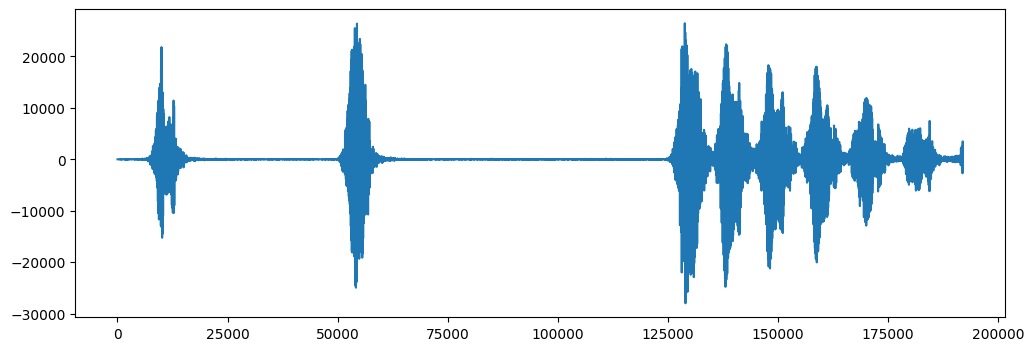

In [71]:
# original audion with 2 channels

plt.figure(figsize=(12,4))
plt.plot(wave_audio)

# Extract Features

Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio samples. The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

In [72]:
mfccs = librosa.feature.mfcc(y=data, sr = sample_rate, n_mfcc= 40)
print(mfccs.shape)

(40, 173)


In [73]:
mfccs

array([[-5.2506586e+02, -5.1955695e+02, -5.1864276e+02, ...,
        -4.3568549e+02, -3.8558670e+02, -3.0779324e+02],
       [ 9.1999216e+00,  1.6759439e+01,  1.8103909e+01, ...,
         1.1375923e+02,  1.4776443e+02,  1.3558249e+02],
       [ 8.8355551e+00,  1.5750109e+01,  1.7259296e+01, ...,
         6.4274643e+01,  4.9179771e+01,  3.2849552e+01],
       ...,
       [ 4.3309441e-01, -3.5408905e+00, -4.8356504e+00, ...,
        -5.2699099e+00, -1.2849629e-01,  7.5349188e-01],
       [ 4.4520652e-01, -3.2774835e+00, -4.6472917e+00, ...,
        -3.4224067e+00,  3.9007015e+00,  5.5314261e-01],
       [ 3.5697106e-01, -2.9899063e+00, -4.4125957e+00, ...,
        -2.6713352e+00,  2.7894583e+00,  1.4206108e-01]], dtype=float32)

In [74]:
# Extracting MFCC's for every audio file

audio_dataset_path = "/kaggle/input/urbansound8k"
metadata.tail()

,slice_file_name,fsID,start,end,salience,fold,classID,class
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn
8731,99812-1-6-0.wav,99812,332.289233,334.821332,2,7,1,car_horn


**Iterate over all file paths**

In [75]:
import os

def features_extractor(file):
    audio, sam_rate = librosa.load(file, res_type='scipy')  # or 'fft'
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sam_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
    return mfccs_scaled_features


In [76]:
!pip install resampy


In [77]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3555it [03:02, 11.39it/s]/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8325it [07:02, 23.76it/s]/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [07:21, 19.80it/s]


In [78]:
extracted_features

[[array([-2.1101833e+02,  6.1279888e+01, -1.2151646e+02, -6.2041412e+01,
         -1.2602481e+01, -3.1079895e+01, -2.6923866e+00,  1.0397655e+01,
          1.4245139e+01,  7.0581574e+00, -5.2578287e+00, -4.2635112e+00,
         -1.1629497e+01,  4.6327720e+00, -1.2314330e+00, -5.6474729e+00,
         -1.3784872e+01, -2.1685631e+00, -1.3650401e+00,  4.8899312e+00,
         -9.5878038e+00, -9.2527666e+00,  7.0211167e+00, -4.2891011e+00,
         -4.8310776e+00, -1.2239560e+00, -2.5584438e+00,  3.6262572e+00,
         -5.4246707e+00, -6.1827803e+00,  1.5694473e+00,  6.4372606e+00,
          1.7054698e-01,  1.3489844e+00, -5.3648686e+00, -3.1457613e+00,
          3.2741258e+00, -1.7759893e+00, -5.6791747e-01,  3.6413565e-01],
        dtype=float32),
  'dog_bark'],
 [array([-4.1554309e+02,  9.7270477e+01, -4.0931149e+01,  4.9012505e+01,
          1.1910921e+01,  5.9163442e+00,  1.3243361e+01, -1.1355361e-01,
          9.0685720e+00,  2.2420862e+00, -1.5633783e+00,  1.1876847e+01,
         -7

# Converting extracted_features to Pandas Dataframe

In [79]:
extracted_features_df = pd.DataFrame(extracted_features, columns= ["feature", "class"])
extracted_features_df.head()

,feature,class
0,"[-211.01833, 61.27989, -121.51646, -62.041412,...",dog_bark
1,"[-415.5431, 97.27048, -40.93115, 49.012505, 11...",children_playing
2,"[-450.98102, 110.367256, -35.585976, 41.206604...",children_playing
3,"[-405.06644, 89.19861, -23.047182, 40.789795, ...",children_playing
4,"[-438.15137, 101.76034, -40.557262, 48.588905,...",children_playing


# Split the dataset into independent and dependent dataset



In [80]:
X = np.array(extracted_features_df["feature"].tolist())
y = np.array(extracted_features_df["class"].tolist())

In [81]:
X.shape

(8732, 40)

In [82]:
# Label Encoding

# y = np.array(pd.get_dummies(y))
# y.shape
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
y = to_categorical(labelencoder.fit_transform(y))

get_dummies will make the class 1 and all other class to 0

[1 0 0 0 0 0 0 0 0 0]

In [83]:
# train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [84]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6985, 40) (1747, 40) (6985, 10) (1747, 10)


In [85]:
print(X_train, y)

[[-1.2328963e+02  1.0147972e+02 -1.1627333e+01 ...  3.3605154e+00
  -1.5666604e+00  3.0260170e+00]
 [-3.7070856e+00  7.7021805e+01  6.1879234e+00 ... -5.0066466e+00
  -3.6462290e+00 -3.0752208e+00]
 [-3.9050232e+01 -1.5010293e+01 -5.3120437e+00 ...  5.6984997e-01
   5.3230667e-01  1.5158819e+00]
 ...
 [-4.2647723e+02  9.1308289e+01  4.4419560e+00 ...  8.0603760e-01
   6.8002886e-01  7.5394464e-01]
 [-1.3595062e+02  1.2242846e+02 -1.9760836e+01 ... -8.4937744e-02
  -5.8458394e-01 -2.1883221e+00]
 [-4.1780762e+02  2.0604321e+02  8.0441856e+00 ... -4.4749050e+00
  -4.2405195e+00 -7.4616045e-01]] [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [86]:
print(y_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


# Model Creation

In [87]:
import tensorflow as tf
print(tf.__version__)

2.16.1


In [88]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [89]:
# num of classes
num_labels = y.shape[1]
num_labels

10

In [90]:
model = Sequential()

# first layer
model.add(Dense(100, input_shape =(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# second layer
model.add(Dense(200))
model.add(Activation("relu"))
model.add(Dropout(0.5))

#final layer
model.add(Dense(num_labels))
model.add(Activation("softmax"))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [91]:
model.compile()

In [92]:
model.summary()



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 100)            │         4,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 200)            │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         2,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,310 (102.77 KB)

 Trainable params: 26,310 (102.77 KB)

 Non-trainable params: 0 (0.00 B)

In [93]:
model.compile(loss="categorical_crossentropy", metrics =["accuracy"],optimizer ='adam')

# Training model

In [94]:
mkdir /kaggle/working/saved_models

mkdir: cannot create directory '/kaggle/working/saved_models': File exists


In [113]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='/kaggle/working/saved_models/audio_classification.keras', 
                               verbose=1, save_best_only=True)

start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
201/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7275 - loss: 0.8081
Epoch 1: val_loss improved from inf to 0.64886, saving model to /kaggle/working/saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7273 - loss: 0.8082 - val_accuracy: 0.7882 - val_loss: 0.6489
Epoch 2/100
207/219 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7156 - loss: 0.8225
Epoch 2: val_loss did not improve from 0.64886
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7160 - loss: 0.8226 - val_accuracy: 0.7831 - val_loss: 0.6801
Epoch 3/100
217/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7169 - loss: 0.8246
Epoch 3: val_loss did not improve from 0.64886
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7169 - loss: 0.8245 - val_accuracy: 0.7813 - val_loss: 0.6655
Epoch 4/100
217/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7194 - loss: 0.8042
Epoch 4: val_loss did not improve from 0.64886
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

In [114]:
test_accuracy = model.evaluate(X_test, y_test, verbose = 0)
print(test_accuracy[1])

0.8059530854225159


In [115]:
print(prediction_feature.shape)
# prediction_feature = prediction_feature.reshape(1,-1)


(1, 40)


In [116]:
audio_file ="/kaggle/input/urbansound8k/fold2/100652-3-0-0.wav"

prediction_feature = features_extractor(audio_file)
prediction_feature = prediction_feature.reshape(1, -1)
# model.predict_classes(prediction_feature)

# Get the prediction probabilities
predictions = model.predict(prediction_feature)
# Get the class with the highest probability
predicted_class = np.argmax(predictions, axis=1)
print(predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[3]


In [117]:
metadata["class"].unique()

array(['dog_bark', 'children_playing', 'car_horn', 'air_conditioner',
       'street_music', 'gun_shot', 'siren', 'engine_idling', 'jackhammer',
       'drilling'], dtype=object)

In [118]:
# List of class labels in the same order as the model's output classes
class_labels = ['dog_bark', 'children_playing', 'car_horn', 'air_conditioner',
                'street_music', 'gun_shot', 'siren', 'engine_idling', 
                'jackhammer', 'drilling']

# Get the predicted class index
predicted_class_index = np.argmax(predictions, axis=1)[0]

# Map the index to the corresponding class label
predicted_class_label = class_labels[predicted_class_index]

print(f"Predicted class: {predicted_class_label}")


Predicted class: air_conditioner


In [101]:
X_test[1]

array([-4.6318756e+02, -3.2000051e+00, -2.9744194e+01,  3.1122919e+01,
       -1.0727508e+01, -2.3191458e+01,  3.3789005e+00, -1.9976597e+01,
       -1.7630381e+01,  4.1088252e+00, -2.5751123e+01, -2.2196878e+01,
        1.2333756e-01, -1.1065108e+01, -1.2424645e+01, -9.1583309e+00,
       -5.1949158e+00,  7.1381612e+00,  1.6465952e+01,  2.0065845e+01,
        2.2573057e+01, -2.2866614e-01, -1.7810253e+01, -5.9174929e+00,
        1.0569784e-01,  2.1674550e+00, -6.0400114e+00, -1.7258171e+01,
       -9.2701883e+00,  1.2328645e+01,  1.1411127e+00, -2.4390686e+01,
       -1.4777607e+01,  8.8036280e+00,  1.0766579e+01, -9.4287533e-01,
       -9.3433362e-01,  1.7401600e+01,  1.4120314e+01, -5.4393992e+00],
      dtype=float32)

# Testing New Audio
Steps
* Preprocess the new audio datapredict the classes
* Invere transform your
*  Predicted Label
Label

In [105]:
!pip uninstall librosa resampy -y
!pip install librosa resampy


Found existing installation: librosa 0.10.2.post1
Uninstalling librosa-0.10.2.post1:
  Successfully uninstalled librosa-0.10.2.post1
Found existing installation: resampy 0.4.3
Uninstalling resampy-0.4.3:
  Successfully uninstalled resampy-0.4.3
  Using cached resampy-0.4.3-py3-none-any.whl.metadata (3.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.1/260.1 kB 4.8 MB/s eta 0:00:0000:01
Using cached resampy-0.4.3-py3-none-any.whl (3.1 MB)


In [ ]:
# filename = "/kaggle/input/urbansound8k/fold1/101415-3-0-2.wav"

# # Load the audio file
# data, sample_rate = librosa.load(filename)


# # Plot the waveform
# plt.figure(figsize=(14, 5))
# librosa.display.waveshow(data, sr=sample_rate)
# plt.title("Waveform of the Audio")
# plt.xlabel("Time (s)")
# plt.ylabel("Amplitude")
# plt.show()

# # Display the audio player
# ipd.Audio(filename)


In [134]:
filename = "/kaggle/input/urbansound8k/fold2/102858-5-0-0.wav"
audio, sample_rate = librosa.load(filename, sr=None)  # No resampling
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)


print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
# predicted_label=model.predict_classes(mfccs_scaled_features)
# print(predicted_label)
# prediction_class = labelencoder.inverse_transform(predicted_label) 
# prediction_class

[-2.0202582e+02  1.4680046e+02 -3.7332760e+01  3.1406250e+01
 -4.5087333e+00  2.3914576e+01  9.7637939e+00  6.0541549e+00
  9.1285219e+00  6.8761377e+00  1.4058296e+01  6.0615325e+00
  1.1002992e+01  4.7000356e+00  6.8098845e+00  1.1103729e+00
  2.4154289e+00  1.2450023e+01  1.0618378e+01  9.3345480e+00
  7.2557249e+00  5.7412653e+00  4.6441822e+00  3.6102297e+00
  6.0080752e+00  1.0253857e+01  3.4098668e+00 -6.5547431e-01
  4.0686827e+00  7.9271250e+00  1.0668954e+01  7.4654589e+00
  2.2842164e+00  4.0517859e+00  3.8825145e+00 -8.9896154e-01
  2.1855035e+00  4.2289634e+00  2.9621372e+00 -4.9176864e-02]
[[-2.0202582e+02  1.4680046e+02 -3.7332760e+01  3.1406250e+01
  -4.5087333e+00  2.3914576e+01  9.7637939e+00  6.0541549e+00
   9.1285219e+00  6.8761377e+00  1.4058296e+01  6.0615325e+00
   1.1002992e+01  4.7000356e+00  6.8098845e+00  1.1103729e+00
   2.4154289e+00  1.2450023e+01  1.0618378e+01  9.3345480e+00
   7.2557249e+00  5.7412653e+00  4.6441822e+00  3.6102297e+00
   6.0080752e+00 

In [135]:
ipd.Audio(filename)

In [140]:
filename = "/kaggle/input/urbansound8k/fold1/101415-3-0-3.wav"
audio, sample_rate = librosa.load(filename, sr=None)  # No resampling
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)


print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)

[-3.9805551e+02  1.1529089e+02  4.4483643e+01  7.0501075e+00
 -2.2044054e+01 -4.3410234e+00  1.0226239e+00 -1.3965656e+01
 -1.8509304e+01 -1.4003156e+01 -1.4930973e+01 -9.4124918e+00
  2.7800167e+00 -3.0381203e+00 -4.5563978e-01  6.1610284e+00
 -1.8035760e+00 -4.5826230e+00 -4.1613035e+00 -4.1386137e+00
  1.4643390e+00  4.1276083e+00 -1.6800678e+00 -3.1685216e+00
  8.7359101e-01  1.9796497e-01 -6.8622649e-01 -1.6083230e+00
 -3.4922271e+00 -1.4216440e+00  1.6009653e+00 -2.4195809e+00
 -4.2153287e+00 -4.6027002e-01 -1.6807050e+00  3.7531750e-03
 -3.6600620e-01 -2.9438860e+00 -1.1287322e+00 -2.4748769e+00]
[[-3.9805551e+02  1.1529089e+02  4.4483643e+01  7.0501075e+00
  -2.2044054e+01 -4.3410234e+00  1.0226239e+00 -1.3965656e+01
  -1.8509304e+01 -1.4003156e+01 -1.4930973e+01 -9.4124918e+00
   2.7800167e+00 -3.0381203e+00 -4.5563978e-01  6.1610284e+00
  -1.8035760e+00 -4.5826230e+00 -4.1613035e+00 -4.1386137e+00
   1.4643390e+00  4.1276083e+00 -1.6800678e+00 -3.1685216e+00
   8.7359101e-01 

In [141]:
# Get prediction probabilities
predictions = model.predict(mfccs_scaled_features.reshape(1, -1))  # Reshape the features

# Get the class with the highest probability
predicted_label = np.argmax(predictions, axis=1)

# Assuming you have a LabelEncoder `labelencoder` for mapping labels
prediction_class = labelencoder.inverse_transform(predicted_label)
print(prediction_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
['dog_bark']


# Predcting using function

    Predicts the audio class given an audio filename and plays the audio.

    Parameters:
    - filename (str): Path to the audio file
    - model (Keras model): Trained Keras model to make predictions
    - labelencoder (LabelEncoder): LabelEncoder for inverse transforming the predicted label
    
    Returns:
    - prediction_class (str): The predicted class label


In [132]:

def predict_audio_class(filename, model, labelencoder):
  
    
    # Play the audio file
    display(ipd.Audio(filename))
    
    # Load the audio file without resampling
    audio, sample_rate = librosa.load(filename, sr=None)

    # Extract MFCC features
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)

    # Scale the MFCC features by taking the mean across the time axis
    mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)

    # Reshape the features to match model input (1, -1) for a single input
    mfccs_scaled_features = mfccs_scaled_features.reshape(1, -1)

    # Get prediction probabilities from the model
    predictions = model.predict(mfccs_scaled_features)

    # Get the predicted label (class with the highest probability)
    predicted_label = np.argmax(predictions, axis=1)

    # Convert the predicted label to the actual class name using the LabelEncoder
    prediction_class = labelencoder.inverse_transform(predicted_label)
    
    return prediction_class



In [142]:
# Example usage:
filename = "/kaggle/input/urbansound8k/fold3/103199-4-0-4.wav"
prediction = predict_audio_class(filename, model, labelencoder)
print("Predicted Class:", prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Predicted Class: ['drilling']
